### Name: Stocks Forecasting Using Stacked LSTM models:

In [1]:
!pip install pandas_datareader --q

- pandas datareader will be used to collect the data of stocks.

In [2]:
import pandas_datareader as pdr

In [3]:
#Saving the API key
key = '<enter your API KEY>'

In [4]:
### Collecting Data about the Stocks:

stock_df = pdr.get_data_tiingo('AAPL', api_key = key)

<ipython-input-4-5c2a68b54e44>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  stock_df = pdr.get_data_tiingo('AAPL', api_key = key)


In [5]:
stock_df

close    high     low     open     volume  \
symbol date                                                                    
AAPL   2018-05-08 00:00:00+00:00  186.05  186.22  183.67  184.990   28402777   
       2018-05-09 00:00:00+00:00  187.36  187.40  185.22  186.550   23211241   
       2018-05-10 00:00:00+00:00  190.04  190.37  187.65  187.740   27989289   
       2018-05-11 00:00:00+00:00  188.59  190.06  187.45  189.490   26212221   
       2018-05-14 00:00:00+00:00  188.15  189.53  187.86  189.010   20778772   
...                                  ...     ...     ...      ...        ...   
       2023-05-01 00:00:00+00:00  169.59  170.45  168.64  169.280   52472936   
       2023-05-02 00:00:00+00:00  168.54  170.35  167.54  170.090   48425696   
       2023-05-03 00:00:00+00:00  167.45  170.92  167.16  169.500   65136018   
       2023-05-04 00:00:00+00:00  165.79  167.04  164.31  164.890   81235427   
       2023-05-05 00:00:00+00:00  173.57  174.30  170.76  170.975  113453171   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2018-05-08 00:00:00+00:00   44.337294   44.377806   43.770120   
       2018-05-09 00:00:00+00:00   44.649478   44.659010   44.139498   
       2018-05-10 00:00:00+00:00   45.288145   45.366787   44.718588   
       2018-05-11 00:00:00+00:00   45.116563   45.468232   44.843839   
       2018-05-14 00:00:00+00:00   45.011301   45.341440   44.941924   
...                                      ...         ...         ...   
       2023-05-01 00:00:00+00:00  169.590000  170.450000  168.640000   
       2023-05-02 00:00:00+00:00  168.540000  170.350000  167.540000   
       2023-05-03 00:00:00+00:00  167.450000  170.920000  167.160000   
       2023-05-04 00:00:00+00:00  165.790000  167.040000  164.310000   
       2023-05-05 00:00:00+00:00  173.570000  174.300000  170.760000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2018-05-08 00:00:00+00:00   44.084687  113611108     0.00          1.0  
       2018-05-09 00:00:00+00:00   44.456448   92844964     0.00          1.0  
       2018-05-10 00:00:00+00:00   44.740035  111957156     0.00          1.0  
       2018-05-11 00:00:00+00:00   45.331871  104848884     0.73          1.0  
       2018-05-14 00:00:00+00:00   45.217040   83115088     0.00          1.0  
...                                      ...        ...      ...          ...  
       2023-05-01 00:00:00+00:00  169.280000   52472936     0.00          1.0  
       2023-05-02 00:00:00+00:00  170.090000   48425696     0.00          1.0  
       2023-05-03 00:00:00+00:00  169.500000   65136018     0.00          1.0  
       2023-05-04 00:00:00+00:00  164.890000   81235427     0.00          1.0  
       2023-05-05 00:00:00+00:00  170.975000  113453171     0.00          1.0  

[1258 rows x 12 columns]

**Inference** : <br>
- We have received the data from 1-05-2018 to 28-04-2023

In [6]:
stock_df.to_csv('Apple_Stocks_Data.csv')

### Performing The predictions On the CLOSE PRICES:

In [7]:
df = stock_df.reset_index()['close']

In [8]:
df.head(10)

0    186.05
1    187.36
2    190.04
3    188.59
4    188.15
5    186.44
6    188.18
7    186.99
8    186.31
9    187.63
Name: close, dtype: float64

In [9]:
df.shape

(1258,)

- Plotting the chart of close price:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

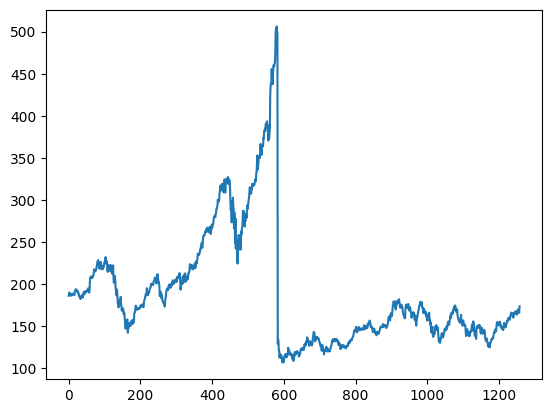

In [11]:
plt.plot(df)
plt.show()

## Data Preprocessing:

- LSTM is very sensitive to the scale of data, so for that we have to apply MinMax Scaler on the dataframe:

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
import numpy as np

In [14]:
ms = MinMaxScaler(feature_range=(0, 1))
df = ms.fit_transform(np.array(df).reshape(-1, 1))

In [15]:
df

array([[0.19839699],
       [0.20167815],
       [0.20839073],
       ...,
       [0.15180964],
       [0.14765185],
       [0.16713838]])

### Splitting the dataset into Train and Test Size:

In [16]:
train_size = int(len(df)*.70)
test_size = len(df)-train_size

#Splitting the dataset into 70% training data and 30% training data

train_data, test_data = df[0:train_size, :], df[train_size:len(df), :1]

In [17]:
train_size, test_size

(880, 378)

In [18]:
len(train_data)

880

In [19]:
len(test_data)

378

- Preprocessing the Training and Testing Data using Timesteps:

In [20]:
import numpy as np
#Creating a helper function to preprocess the data into independent and dependent features:
def create_dataset(dataset, time_step):
  data_x, data_y = [], [] #x-> will contain the input preprocessed features, y -> contain the testing or the output features

  #Slicing and Splitting of the Data(Features):
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i : (i+time_step), 0]  #Slicing all the Input Features:
    data_x.append(a)


    data_y.append(dataset[i+time_step, 0])

  return np.array(data_x), np.array(data_y)



In [21]:
time_step=100

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


print(X_train.shape)
print(y_train.shape)

(779, 100)
(779,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(277, 100)
(277,)


### Model Creation == Stacked LSTM:

In [23]:

#Before we create the stacked lstm model, we need to convert our data into a 3 dim matrix
#the 3-dim would be [samples, time_steps, features]


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

- Creating the model:

In [24]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
from keras.layers import Dropout

In [26]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1],1))) #the value passed will be (100, 1) as it is fixed for the both X_train and X_test
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


- Fitting the model to the training data:

In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 20s 150ms/step - loss: 0.0263 - val_loss: 0.0047
Epoch 2/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0116 - val_loss: 0.0013
Epoch 3/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0080 - val_loss: 0.0010
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0066 - val_loss: 4.6856e-04
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0059 - val_loss: 5.8958e-04
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0106 - val_loss: 3.3930e-04
Epoch 7/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0066 - val_loss: 3.3738e-04
Epoch 8/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0045 - val_loss: 3.6295e-04
Epoch 9/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0043 - val_loss: 3.3905e-04
Epoch 10/100
13/13 [==============================] - 0s 25ms/step - loss:

In [29]:
## Predicting values for Training and Testing Data:

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

9/9 [==============================] - 0s 8ms/step


In [30]:
#Since the data is scaled down to ranges of (0,1), we inverse transform the data

train_pred = ms.inverse_transform(train_pred)
test_pred = ms.inverse_transform(test_pred)

### Evaluating the Performance Metrics:


In [31]:
## Calculating the Mean_Squared_error on the training data

from  sklearn.metrics import mean_squared_error
import math 
math.sqrt(mean_squared_error(y_train, train_pred))

219.60898437769822

In [32]:
## Calculating the mean squared error on testing data

math.sqrt(mean_squared_error(y_test, test_pred))

151.416186902579

- Plotting the train and test preds:

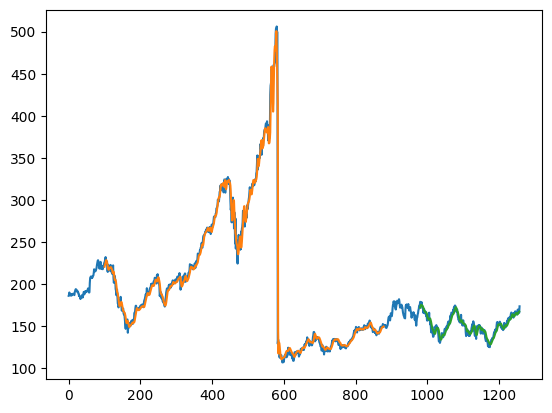

In [34]:
#shifting train predictions for the plot


look_back = 100
train_pred_plot = np.empty_like(df)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back : len(train_pred)+look_back, :] = train_pred

#Shifting test prediction for plotting

test_pred_plot = np.empty_like(df)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred)+(look_back*2)+1 : len(df)-1, :] = test_pred

#Inverse transforming the values and showing the plots

#1. Plotting the original df:
plt.plot(ms.inverse_transform(df))

#2. Plotting the training data predictions over the original df:
plt.plot(train_pred_plot)

#3. Plotting the testing data predictions over the original df:
plt.plot(test_pred_plot)
plt.savefig("Stock_Prediction_Graph(AAPL).jpg")
plt.show()

### Phase: Forecasting for Next 30 days:

In [35]:
len(test_data)

378

In [36]:
## Since it is a time-series data: to forecast the data for n days into the future we need to relate to the past data as well.
#Testing data Size = 378; 100 days back = 278


x_input = test_data[278 : ].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
#Convert this array into a list

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
## Creating a Logic for the forecasting of the stocks for the n days into future: 30 days in our case:



from numpy import array 

lst_out = []
time_steps = 100
i = 0

while(i<30):


  if len(temp_input)>100:
    x_input = np.array(temp_input[1:])
    print(f"{i} day : input {x_input}")
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, time_steps, 1))

    y_hat = model.predict(x_input, verbose = 0)
    print(f"{i} day : Output {y_hat}")
    temp_input.extend(y_hat[0].tolist())
    temp_input = temp_input[1:]
    lst_out.extend(y_hat.tolist())
    i+=1


  else:
    x_input = x_input.reshape((1, time_steps, 1))
    y_hat = model.predict(x_input, verbose = 0)
    temp_input.extend(y_hat[0].tolist())
    lst_out.extend(y_hat.tolist())
    i+=1


print(lst_out)


0 day : input [0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.1

- Plotting the new predicted data:



In [44]:
day_new = np.arange(1, 101)
day_predict = np.arange(101, 131)


In [45]:
len(df)

1258

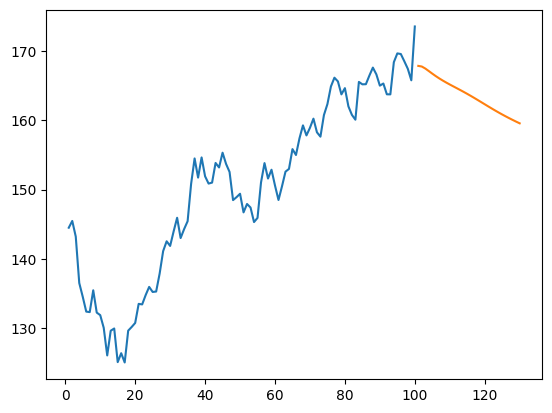

In [46]:
#Plotting the new data:

plt.plot(day_new, ms.inverse_transform(df[1158: ]))
plt.plot(day_predict, ms.inverse_transform(lst_out)) 
plt.savefig("30_days_pred.jpg")
plt.show()

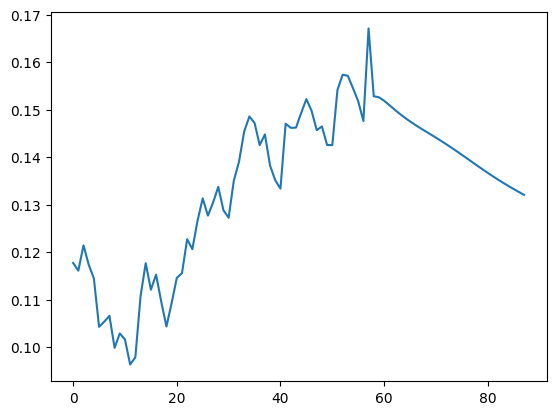

In [48]:
df2 = df.tolist()
df2.extend(lst_out)
plt.savefig("Full chart.jpg")
plt.plot(df2[1200:])